X Allow shorting

In [2]:
pip install pandas_datareader

     |████████████████████████████████| 112kB 9.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_index = ['0883.HK','0267.HK','0960.HK','1038.HK','0006.HK','0003.HK','2628.HK','0241.HK','1044.HK','0012.HK',
              '0002.HK','0101.HK','2020.HK','1109.HK','0016.HK','2018.HK','0017.HK','1093.HK','2269.HK','1997.HK',
              '1810.HK','0386.HK','9988.HK','2319.HK','1299.HK','0669.HK','1928.HK','0027.HK','1398.HK','3690.HK']
stockdf = pd.DataFrame()
dailydf = pd.DataFrame()
for i in data_index:
    HKEX = pdr.get_data_yahoo(i, start = "2019-12-1", end = "2021-5-1")
    daily_returns = HKEX['Adj Close'].resample('D').ffill().pct_change()
    stockdf[i] = daily_returns

In [4]:
stock = stockdf.iloc[1:]
sigmaa = stock.cov()
mu = np.mean(stock,axis=0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


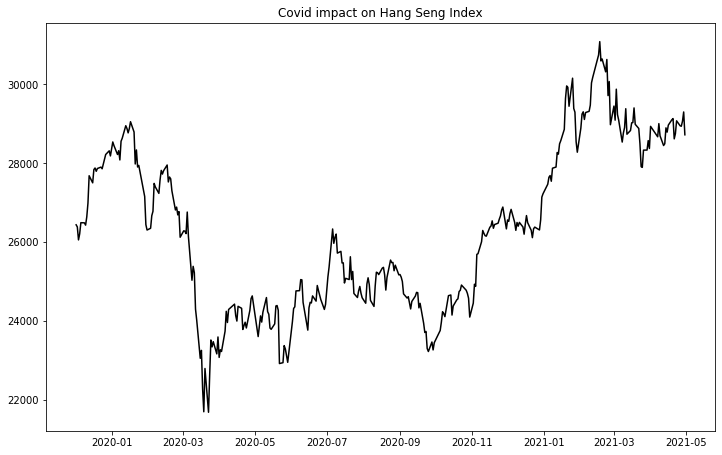

In [5]:
DJI = pdr.get_data_yahoo('^HSI',start = '2019-12-1',end = '2021-5-1')
dji = DJI['Adj Close']
fig = plt.gcf()
fig.set_size_inches(12, 7.5)
plt.plot(dji,color='black')
plt.title('Covid impact on Hang Seng Index')
plt.show()

In [6]:
import cvxpy as cp
def GMVP(Sigma):
    w = cp.Variable(len(mu))
    variance = cp.quad_form(w,Sigma)
    problem = cp.Problem(cp.Minimize(variance)
                         , [w>=0,cp.sum(w)==1])
    problem.solve()
    return w.value


In [14]:
w_gmvp = GMVP(sigmaa)
w_gmvp

array([-2.65941598e-18,  1.02703351e-18, -4.88831618e-18,  2.63189130e-17,
        4.04502207e-02,  2.12295782e-01,  3.18349174e-17,  8.64864653e-18,
        1.08875699e-01, -3.68324679e-18,  3.81056855e-01,  2.28867190e-18,
        4.25822456e-17,  1.79493996e-17, -8.95756188e-18,  3.39948272e-17,
        7.92281136e-18, -2.38641816e-17,  2.26911068e-02,  1.99654634e-17,
       -1.10434516e-17, -2.75775320e-17,  4.81321335e-02,  1.22407200e-02,
        4.68779024e-18, -1.06321374e-17,  3.61765489e-18, -1.55028126e-17,
        1.74257483e-01, -2.07383359e-18])

In [24]:
def MVP(mu,Sigma,lmd = -1):
    w = cp.Variable(len(mu))
    variance = cp.quad_form(w,Sigma)
    expected_return = w@mu
    obj = variance - lmd*expected_return
    problem = cp.Problem(cp.Minimize(obj),[w>=0,cp.sum(w)==1])
    problem.solve()
    return w.value

In [25]:
w_mvp = MVP(mu,sigmaa)


In [17]:
def MSRP(mu,Sigma):
    w = cp.Variable(len(mu))
    variance = cp.quad_form(w,Sigma)
    problem = cp.Problem(cp.Minimize(variance),[w>=0,w@mu==1])
    problem.solve()
    return w.value/np.sum(w.value)

In [18]:
w_msrp = MSRP(mu,sigmaa) 
w_msrp

array([1.16700004e-19, 1.27263113e-19, 6.36987580e-02, 9.44343842e-20,
       7.04536453e-20, 7.90728030e-20, 1.24450770e-19, 7.55394866e-02,
       6.94577958e-20, 1.02996007e-19, 6.37665015e-20, 6.43179537e-20,
       2.47357156e-20, 1.70333265e-19, 9.55245473e-20, 1.41138652e-19,
       9.99423125e-20, 5.32427919e-20, 4.69216851e-01, 8.63982466e-20,
       1.97160348e-01, 8.35131691e-20, 9.29544415e-20, 2.27346691e-20,
       6.40096384e-20, 1.94384556e-01, 9.48227273e-20, 9.27353699e-20,
       5.62477904e-20, 1.85861192e-21])

In [19]:
w_mdp = MSRP(np.sqrt(np.diag(sigmaa)),sigmaa)
w_mdp

array([ 5.13950003e-04, -2.91953082e-18,  3.42210684e-02,  1.50693120e-17,
        7.07577074e-03,  2.70003992e-01,  9.86436460e-18,  6.50869479e-02,
        1.09020159e-01, -4.73833384e-19,  5.40407905e-18,  1.29047396e-18,
        8.35963466e-18,  6.65429508e-18, -1.34805003e-18,  6.22336249e-03,
        2.17331567e-18,  3.56326113e-02,  6.01824822e-02,  6.85694957e-02,
        5.10715099e-02,  1.02296672e-01,  3.16134951e-02, -6.84455415e-18,
        6.31605533e-18, -1.71075215e-17,  3.75801844e-18,  1.30571320e-18,
        1.23496101e-01,  3.49923818e-02])

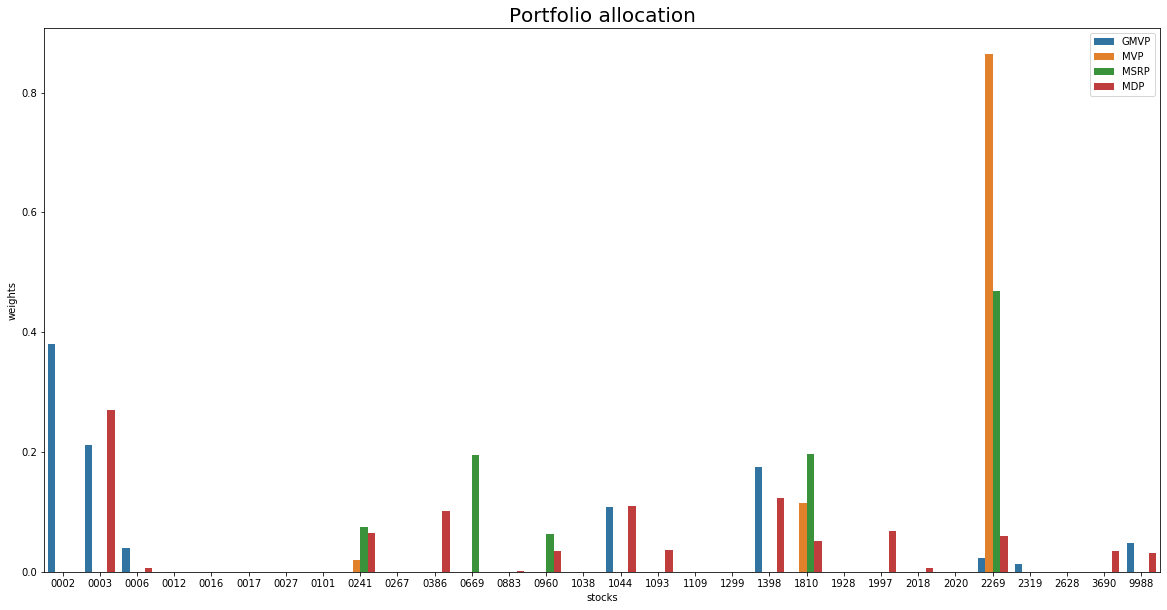

In [20]:
port_name = ['GMVP','MVP','MSRP','MDP']
data_indexs = ['0883','0267','0960','1038','0006','0003','2628','0241','1044','0012',
              '0002','0101','2020','1109','0016','2018','0017','1093','2269','1997',
              '1810','0386','9988','2319','1299','0669','1928','0027','1398','3690']
w_all = dict(weights = np.concatenate([w_gmvp, w_mvp, w_msrp, w_mdp]),
            stocks = 4*data_indexs, 
            portfolio = np.repeat(port_name,len(data_index)))
df = pd.DataFrame(w_all)
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax = sns.barplot(x='stocks', y='weights', hue='portfolio', data=df)
plt.title('Portfolio allocation',size=20)
ax.legend(loc='best',prop={'size': 10})
plt.draw()

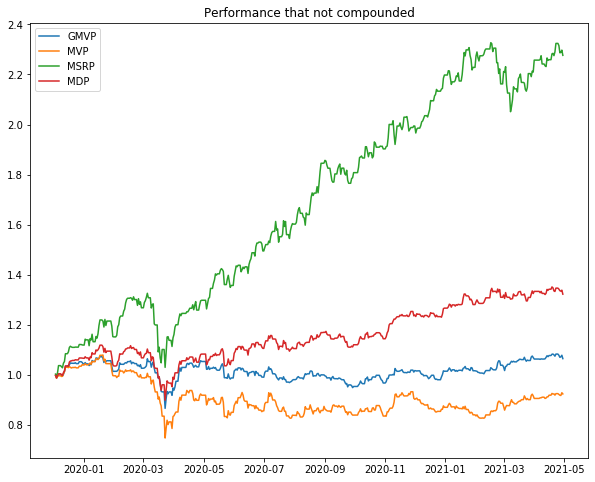

In [26]:
ret_gmvp = stock@w_gmvp
ret_mvp = stock@w_mvp
ret_msrp = stock@w_msrp
ret_mdp = stock@w_mdp
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 8)
plt.plot(1 + np.cumsum(ret_gmvp), label='GMVP')
plt.plot(1 + np.cumsum(ret_mvp), label='MVP')
plt.plot(1 + np.cumsum(ret_msrp), label='MSRP')
plt.plot(1 + np.cumsum(ret_mdp), label='MDP')
plt.legend()
plt.title('Performance that not compounded')
plt.show()

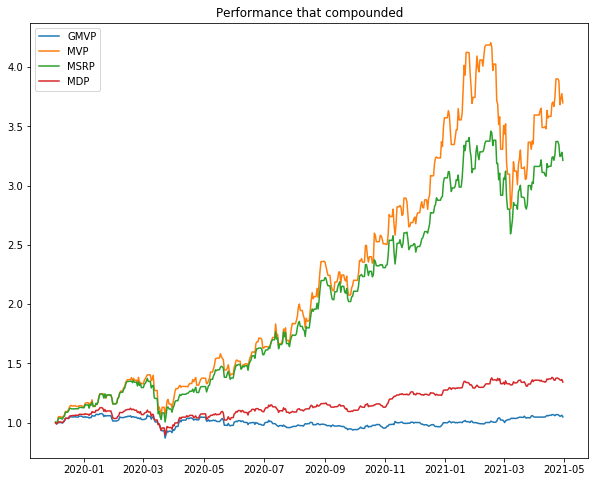

In [22]:
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 8)
plt.plot(np.cumprod(1 + ret_gmvp), label='GMVP')
plt.plot(np.cumprod(1 + ret_mvp), label='MVP')
plt.plot(np.cumprod(1 + ret_msrp), label='MSRP')
plt.plot(np.cumprod(1 + ret_mdp), label='MDP')
plt.legend()
plt.title('Performance that compounded')
plt.show()

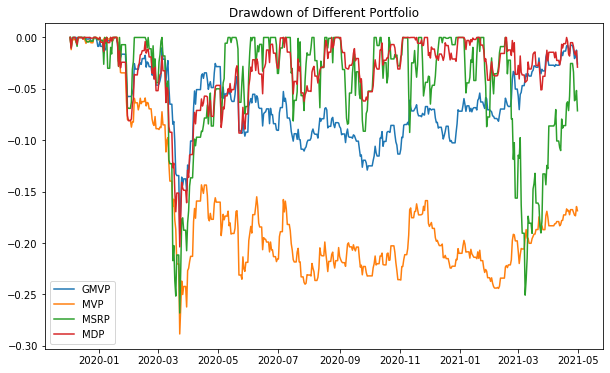

In [27]:
x1 = (1+ret_gmvp).cumprod()
p1 = x1.cummax()
d1 = (x1-p1)/p1
plt.plot(d1,label='GMVP')
x2 = (1+ret_mvp).cumprod()
p2 = x2.cummax()
d2 = (x2-p2)/p2
plt.plot(d2,label='MVP')
x3 = (1+ret_msrp).cumprod()
p3 = x3.cummax()
d3 = (x3-p3)/p3
plt.plot(d3,label='MSRP')
x4 = (1+ret_mdp).cumprod()
p4 = x4.cummax()
d4 = (x4-p4)/p4
plt.plot(d4,label='MDP')
plt.legend()
plt.title('Drawdown of Different Portfolio')
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 6)
plt.show()